# Zero to Hero

## 2.01 Optimizacion Bayesiana

### Advertencia

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### El código

In [2]:
#Ejemplo de optimizacion bayesiana, univariada

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

require("data.table")
#paquetes necesarios para la Bayesian Optimization
require("DiceKriging")
require("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2083240,111.3,4281477,228.7,2518102,134.5
Vcells,3515829,26.9,8388608,64.0,6734285,51.4


### Defino la funcion a optimizar, un polinomio de grado 4

In [3]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

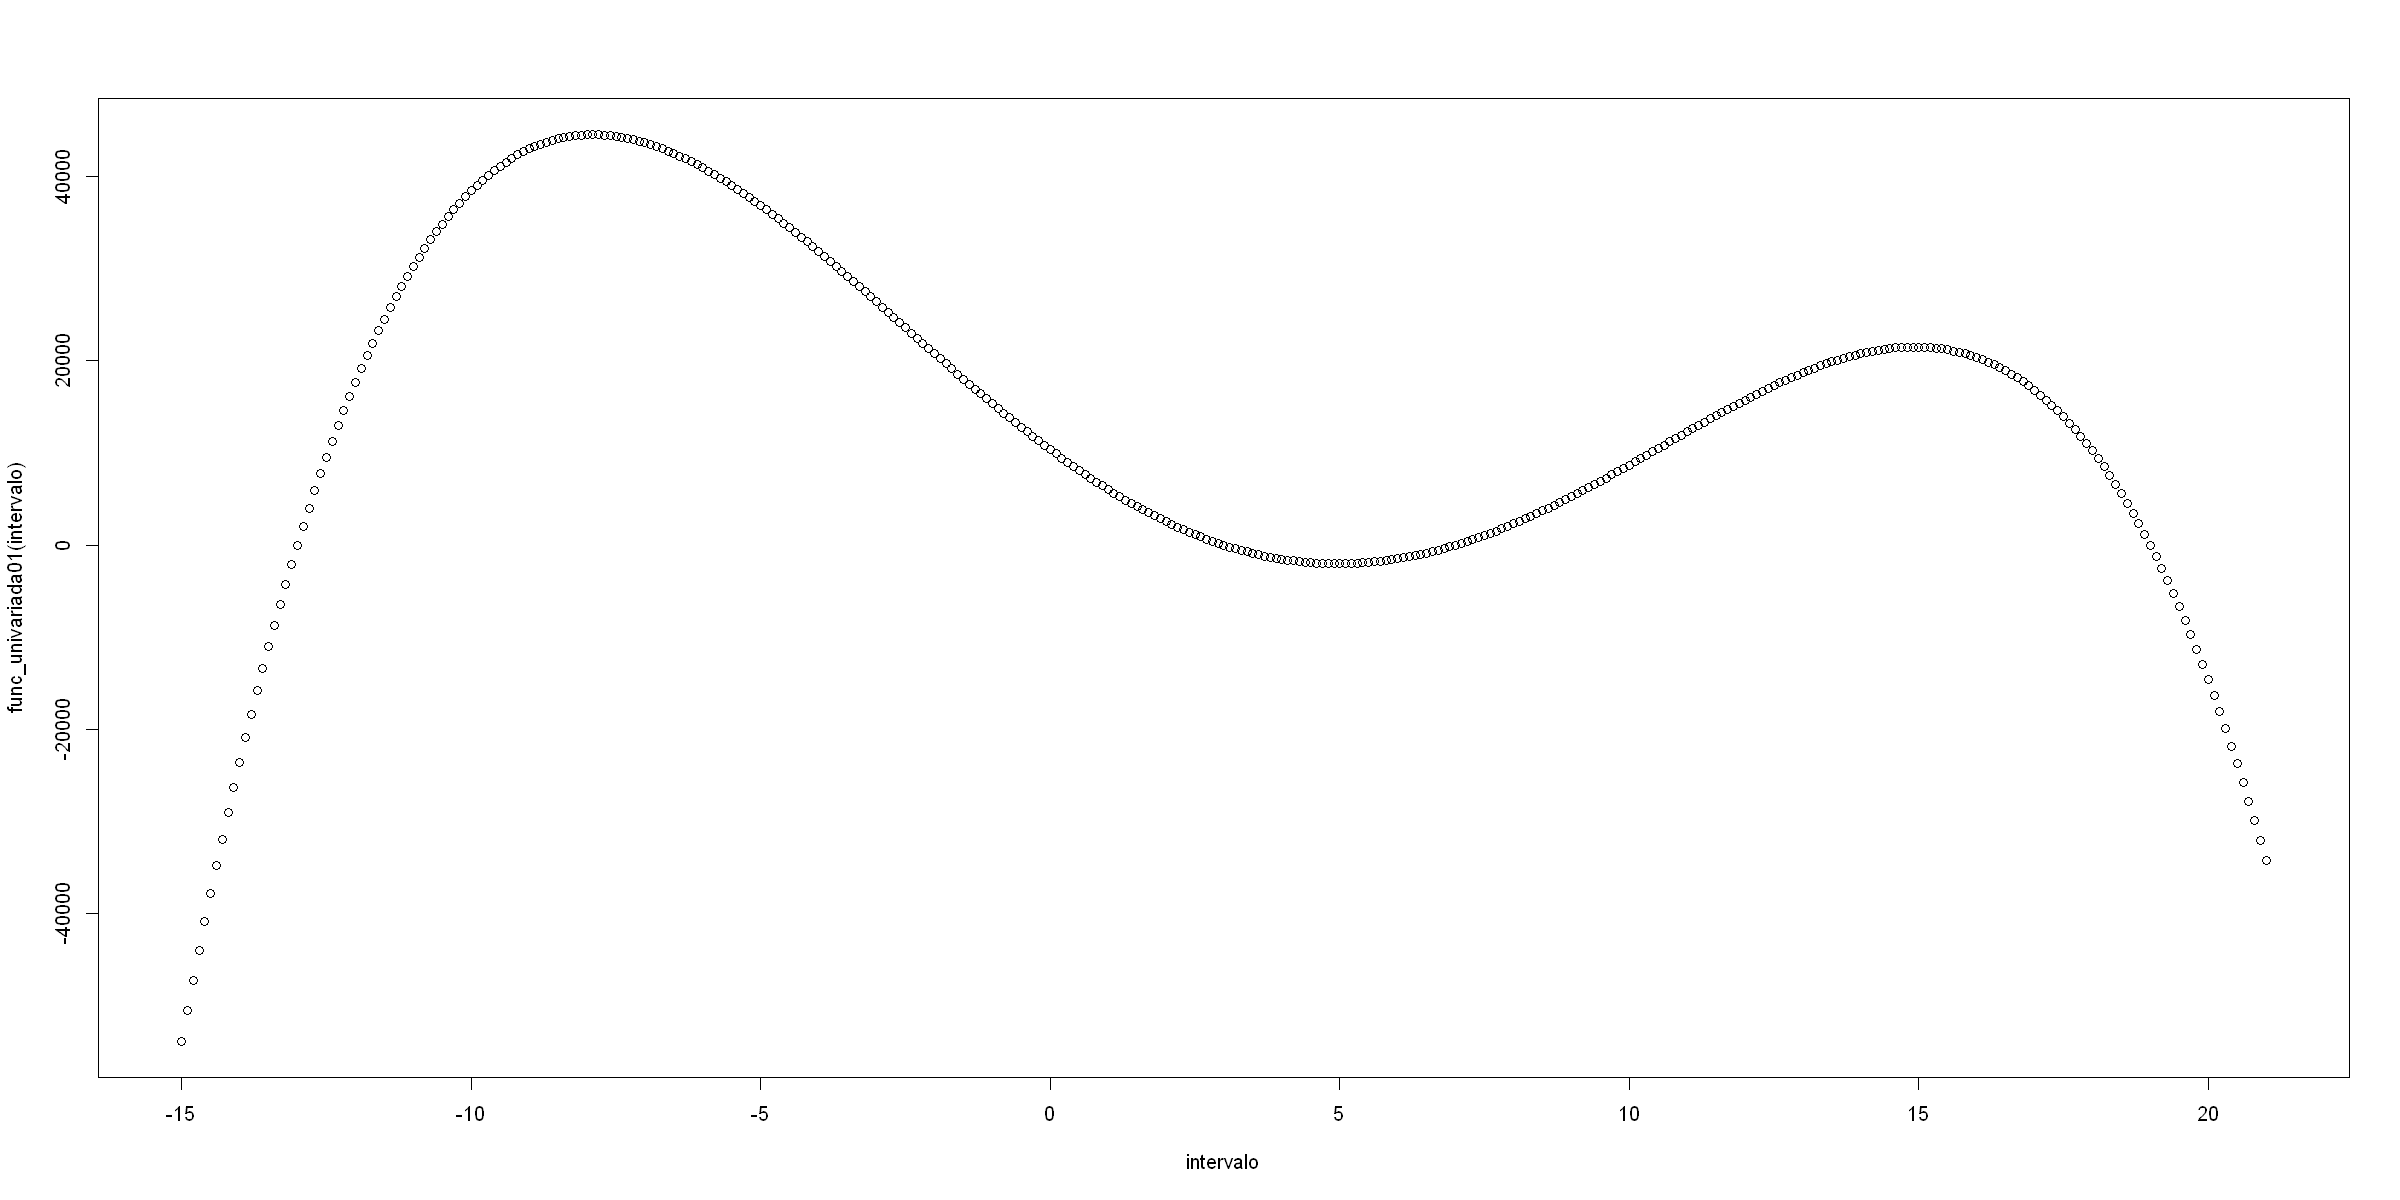

In [4]:
intervalo  <- seq(-15,21,0.1)
plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [5]:
obj.fun  <- makeSingleObjectiveFunction(
              fn=       func_univariada01,
              minimize= FALSE,   #estoy Maximizando la ganancia
              par.set=  makeParamSet(  makeNumericParam( "x", lower= -100, upper=  100) ),
             )

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [6]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [7]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 25 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [8]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=-0.0827 : y = 1.08e+04 : 0.0 secs : initdesign

[mbo] 0: x=19.8 : y = -1.18e+04 : 0.0 secs : initdesign

[mbo] 0: x=77.6 : y = -5.6e+07 : 0.0 secs : initdesign

[mbo] 0: x=-83.2 : y = -1.12e+08 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -75.47711 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       75.477  |proj g|=    0.0019178
At iterate     1  f =       75.477  |proj g|=     0.0019169
At iterate     2  f =       75.474  |proj g|=    0.00024201
At iterate     3  f =       75.473  |proj g|=    2.5576e-05
At iterate     4  f =       75.473  |proj g|=     2.961e-07
At iterate     5  f =       75.473  |proj g|=    3.6835e-10

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 3.68352e-10
final functio

[mbo] 1: x=9.72 : y = 7.71e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -91.94909 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       91.949  |proj g|=    0.0011888
At iterate     1  f =       91.949  |proj g|=     0.0011885
At iterate     2  f =       91.947  |proj g|=    0.00013785
At iterate     3  f =       91.947  |proj g|=    1.3741e-05
At iterate     4  f =       91.947  |proj g|=    1.4065e-07
At iterate     5  f =       91.947  |proj g|=    1.4542e-10

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.45417e-10
final functio

[mbo] 2: x=32.3 : y = -8.95e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -108.9347 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       108.93  |proj g|=    0.0011522
At iterate     1  f =       108.93  |proj g|=     0.0011519
At iterate     2  f =       108.93  |proj g|=    9.7488e-05
At iterate     3  f =       108.93  |proj g|=    9.1683e-06
At iterate     4  f =       108.93  |proj g|=    8.2693e-08

iterations 4
function evaluations 5
segments explored during Cauchy searches 4
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 8.26934e-08
final function value 108.932

F = 108.932
final  value 108.931929 
conver

[mbo] 3: x=26 : y = -2.38e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -123.9665 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       123.97  |proj g|=    0.0014989
At iterate     1  f =       123.97  |proj g|=     0.0014987
At iterate     2  f =       123.96  |proj g|=    0.00052315
At iterate     3  f =       123.95  |proj g|=    0.00011681
At iterate     4  f =       123.95  |proj g|=    7.1357e-06
At iterate     5  f =       123.95  |proj g|=    1.0546e-07

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.05459e-07
final functio

[mbo] 4: x=4.14 : y = -1.66e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -138.4903 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       138.49  |proj g|=   0.00030427
At iterate     1  f =       138.49  |proj g|=    0.00030424

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000304239
final function value 138.49

F = 138.49
final  value 138.490328 
converged


[mbo] 5: x=14.8 : y = 2.15e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -152.6577 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       152.66  |proj g|=   0.00041962
At iterate     1  f =       152.66  |proj g|=     0.0004196

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000419597
final function value 152.658

F = 152.658
final  value 152.657674 
converged


[mbo] 6: x=-9.45 : y = 4.14e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -169.0696 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       169.07  |proj g|=   4.6532e-05
At iterate     1  f =       169.07  |proj g|=     4.653e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.65295e-05
final function value 169.07

F = 169.07
final  value 169.069621 
converged


[mbo] 7: x=-5.7 : y = 3.99e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -183.2559 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       183.26  |proj g|=   0.00045418
At iterate     1  f =       183.26  |proj g|=    0.00045417

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.00045417
final function value 183.256

F = 183.256
final  value 183.255926 
converged


[mbo] 8: x=-15.9 : y = -8.56e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -199.0818 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       199.08  |proj g|=   0.00012099
At iterate     1  f =       199.08  |proj g|=    0.00012099

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000120988
final function value 199.082

F = 199.082
final  value 199.081757 
converged


[mbo] 9: x=-12.9 : y = 2.18e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -212.6416 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       212.64  |proj g|=   6.9028e-06
At iterate     1  f =       212.64  |proj g|=    6.9028e-06

iterations 1
function evaluations 18
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 6.9028e-06
final function value 212.642

F = 212.642
   in the last line search
final  value 212.641564 
converged


[mbo] 10: x=-2.99 : y = 2.63e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -225.7082 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       225.71  |proj g|=   0.00011494
At iterate     1  f =       225.71  |proj g|=    0.00011494

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000114942
final function value 225.708

F = 225.708
final  value 225.708173 
converged


[mbo] 11: x=17.3 : y = 1.54e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -238.6521 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       238.65  |proj g|=    0.0010971
At iterate     1  f =       238.65  |proj g|=     0.0010971
At iterate     2  f =       238.64  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 238.637

F = 238.637
final  value 238.637098 
converged


[mbo] 12: x=6.99 : y = -17.5 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -251.7682 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       251.77  |proj g|=    0.0035423
At iterate     1  f =       251.77  |proj g|=     0.0035421
At iterate     2  f =       251.64  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 251.636

F = 251.636
final  value 251.635657 
converged


[mbo] 13: x=12.3 : y = 1.68e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -264.3988 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        264.4  |proj g|=    0.0019718
At iterate     1  f =        264.4  |proj g|=     0.0019717
At iterate     2  f =       264.39  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 264.391

F = 264.391
final  value 264.391400 
converged


[mbo] 14: x=-7.63 : y = 4.45e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -276.7845 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       276.78  |proj g|=    0.0031298
At iterate     1  f =       276.78  |proj g|=     0.0031297
At iterate     2  f =       276.73  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 276.735

F = 276.735
final  value 276.734943 
converged


[mbo] 15: x=1.97 : y = 2.63e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -289.2548 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       289.25  |proj g|=    0.0037356
At iterate     1  f =       289.25  |proj g|=     0.0037354
At iterate     2  f =        289.2  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 289.2

F = 289.2
final  value 289.199506 
converged


[mbo] 16: x=22.4 : y = -7.1e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -302.1808 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       302.18  |proj g|=    0.0039264
At iterate     1  f =       302.18  |proj g|=     0.0039263
At iterate     2  f =       302.16  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 302.157

F = 302.157
final  value 302.156770 
converged


[mbo] 17: x=-11 : y = 3.07e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -314.4545 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       314.45  |proj g|=    0.0064011
At iterate     1  f =       314.45  |proj g|=     0.0064007
At iterate     2  f =       314.25  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 314.254

F = 314.254
final  value 314.254430 
converged


[mbo] 18: x=-4.41 : y = 3.4e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -326.0532 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       326.05  |proj g|=    0.0052228
At iterate     1  f =       326.05  |proj g|=     0.0052225
At iterate     2  f =       326.02  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 326.017

F = 326.017
final  value 326.016760 
converged


[mbo] 19: x=-6.72 : y = 4.31e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -337.2923 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       337.29  |proj g|=    0.0060463
At iterate     1  f =       337.29  |proj g|=      0.006046
At iterate     2  f =       337.23  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 337.231

F = 337.231
final  value 337.231466 
converged


[mbo] 20: x=-1.59 : y = 1.85e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -349.3163 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       349.32  |proj g|=     0.009195
At iterate     1  f =       349.32  |proj g|=     0.0091942
At iterate     2  f =       348.99  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 348.99

F = 348.99
final  value 348.990053 
converged


[mbo] 21: x=-8.53 : y = 4.41e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -360.4523 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       360.45  |proj g|=     0.010506
At iterate     1  f =       360.45  |proj g|=      0.010505
At iterate     2  f =       360.04  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 360.044

F = 360.044
final  value 360.043647 
converged


[mbo] 22: x=13.6 : y = 2.01e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -371.8399 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       371.84  |proj g|=    0.0092227
At iterate     1  f =       371.84  |proj g|=     0.0092219
At iterate     2  f =       371.62  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 371.622

F = 371.622
final  value 371.621827 
converged


[mbo] 23: x=-14.3 : y = -3.2e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -383.7178 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       383.72  |proj g|=    0.0087166
At iterate     1  f =       383.72  |proj g|=      0.008716
At iterate     2  f =       383.62  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 383.617

F = 383.617
final  value 383.616508 
converged


[mbo] 24: x=16 : y = 2.03e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -395.5013 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        395.5  |proj g|=     0.012167
At iterate     1  f =        395.5  |proj g|=      0.012166
At iterate     2  f =       395.08  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 395.077

F = 395.077
final  value 395.077460 
converged


[mbo] 25: x=11 : y = 1.24e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  321.6801 
  - best initial criterion value(s) :  -406.9817 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       406.98  |proj g|=      0.01222
At iterate     1  f =       406.98  |proj g|=      0.012218
At iterate     2  f =       406.61  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 406.612

F = 406.612
final  value 406.611538 
converged


In [9]:
tb_resultados  <- as.data.table( run$opt.path )

In [10]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-0.08265348,1.076373e+04,0,NA,NA,0.03,NA,NA,NA,initdesign,NA,NA,NA
19.83299155,-1.181599e+04,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
77.60946675,-5.595362e+07,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
-83.23060056,-1.117256e+08,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
9.72147246,7.712832e+03,1,NA,NA,0.00,-4364682.439,NA,0.03,infill_ei,0.19,6483475.99,3.019742e+06
32.30840845,-8.945240e+05,2,NA,NA,0.00,-894344.039,NA,0.02,infill_ei,0.20,7929301.44,-6.617211e+06
25.98323306,-2.375449e+05,3,NA,NA,0.00,-672843.239,NA,0.01,infill_ei,0.19,1413377.27,2.167796e+05
4.14118343,-1.661869e+03,4,NA,NA,0.00,-496093.602,NA,0.02,infill_ei,0.19,824465.73,3.039593e+05
14.81112866,2.149566e+04,5,NA,NA,0.00,-264367.944,NA,0.05,infill_ei,0.22,611317.13,5.069873e+04


In [11]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-7.630383,44479.03,14,NA,NA,0,-40113.26,NA,0.01,infill_ei,0.19,92828.86,47381.82


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?